# Resumé du projet - Segmentez des clients d'un site e-commerce

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

## Objetifs
- Comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

## Fournir à l’équipe marketing
- Description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale
- Proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

## Demande du client:
- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Pour cette mission, on utilise une base de données anonymisée comportant des informations sur l’historique de commandes depuis janvier 2017. Cette base de données est fournit par Olist, une solution de vente sur les marketplaces en ligne.

## Méthode
Pour soutenir notre client dans son projet de segmentation de la clientèle, nous avons appliqué la méthode suivante:


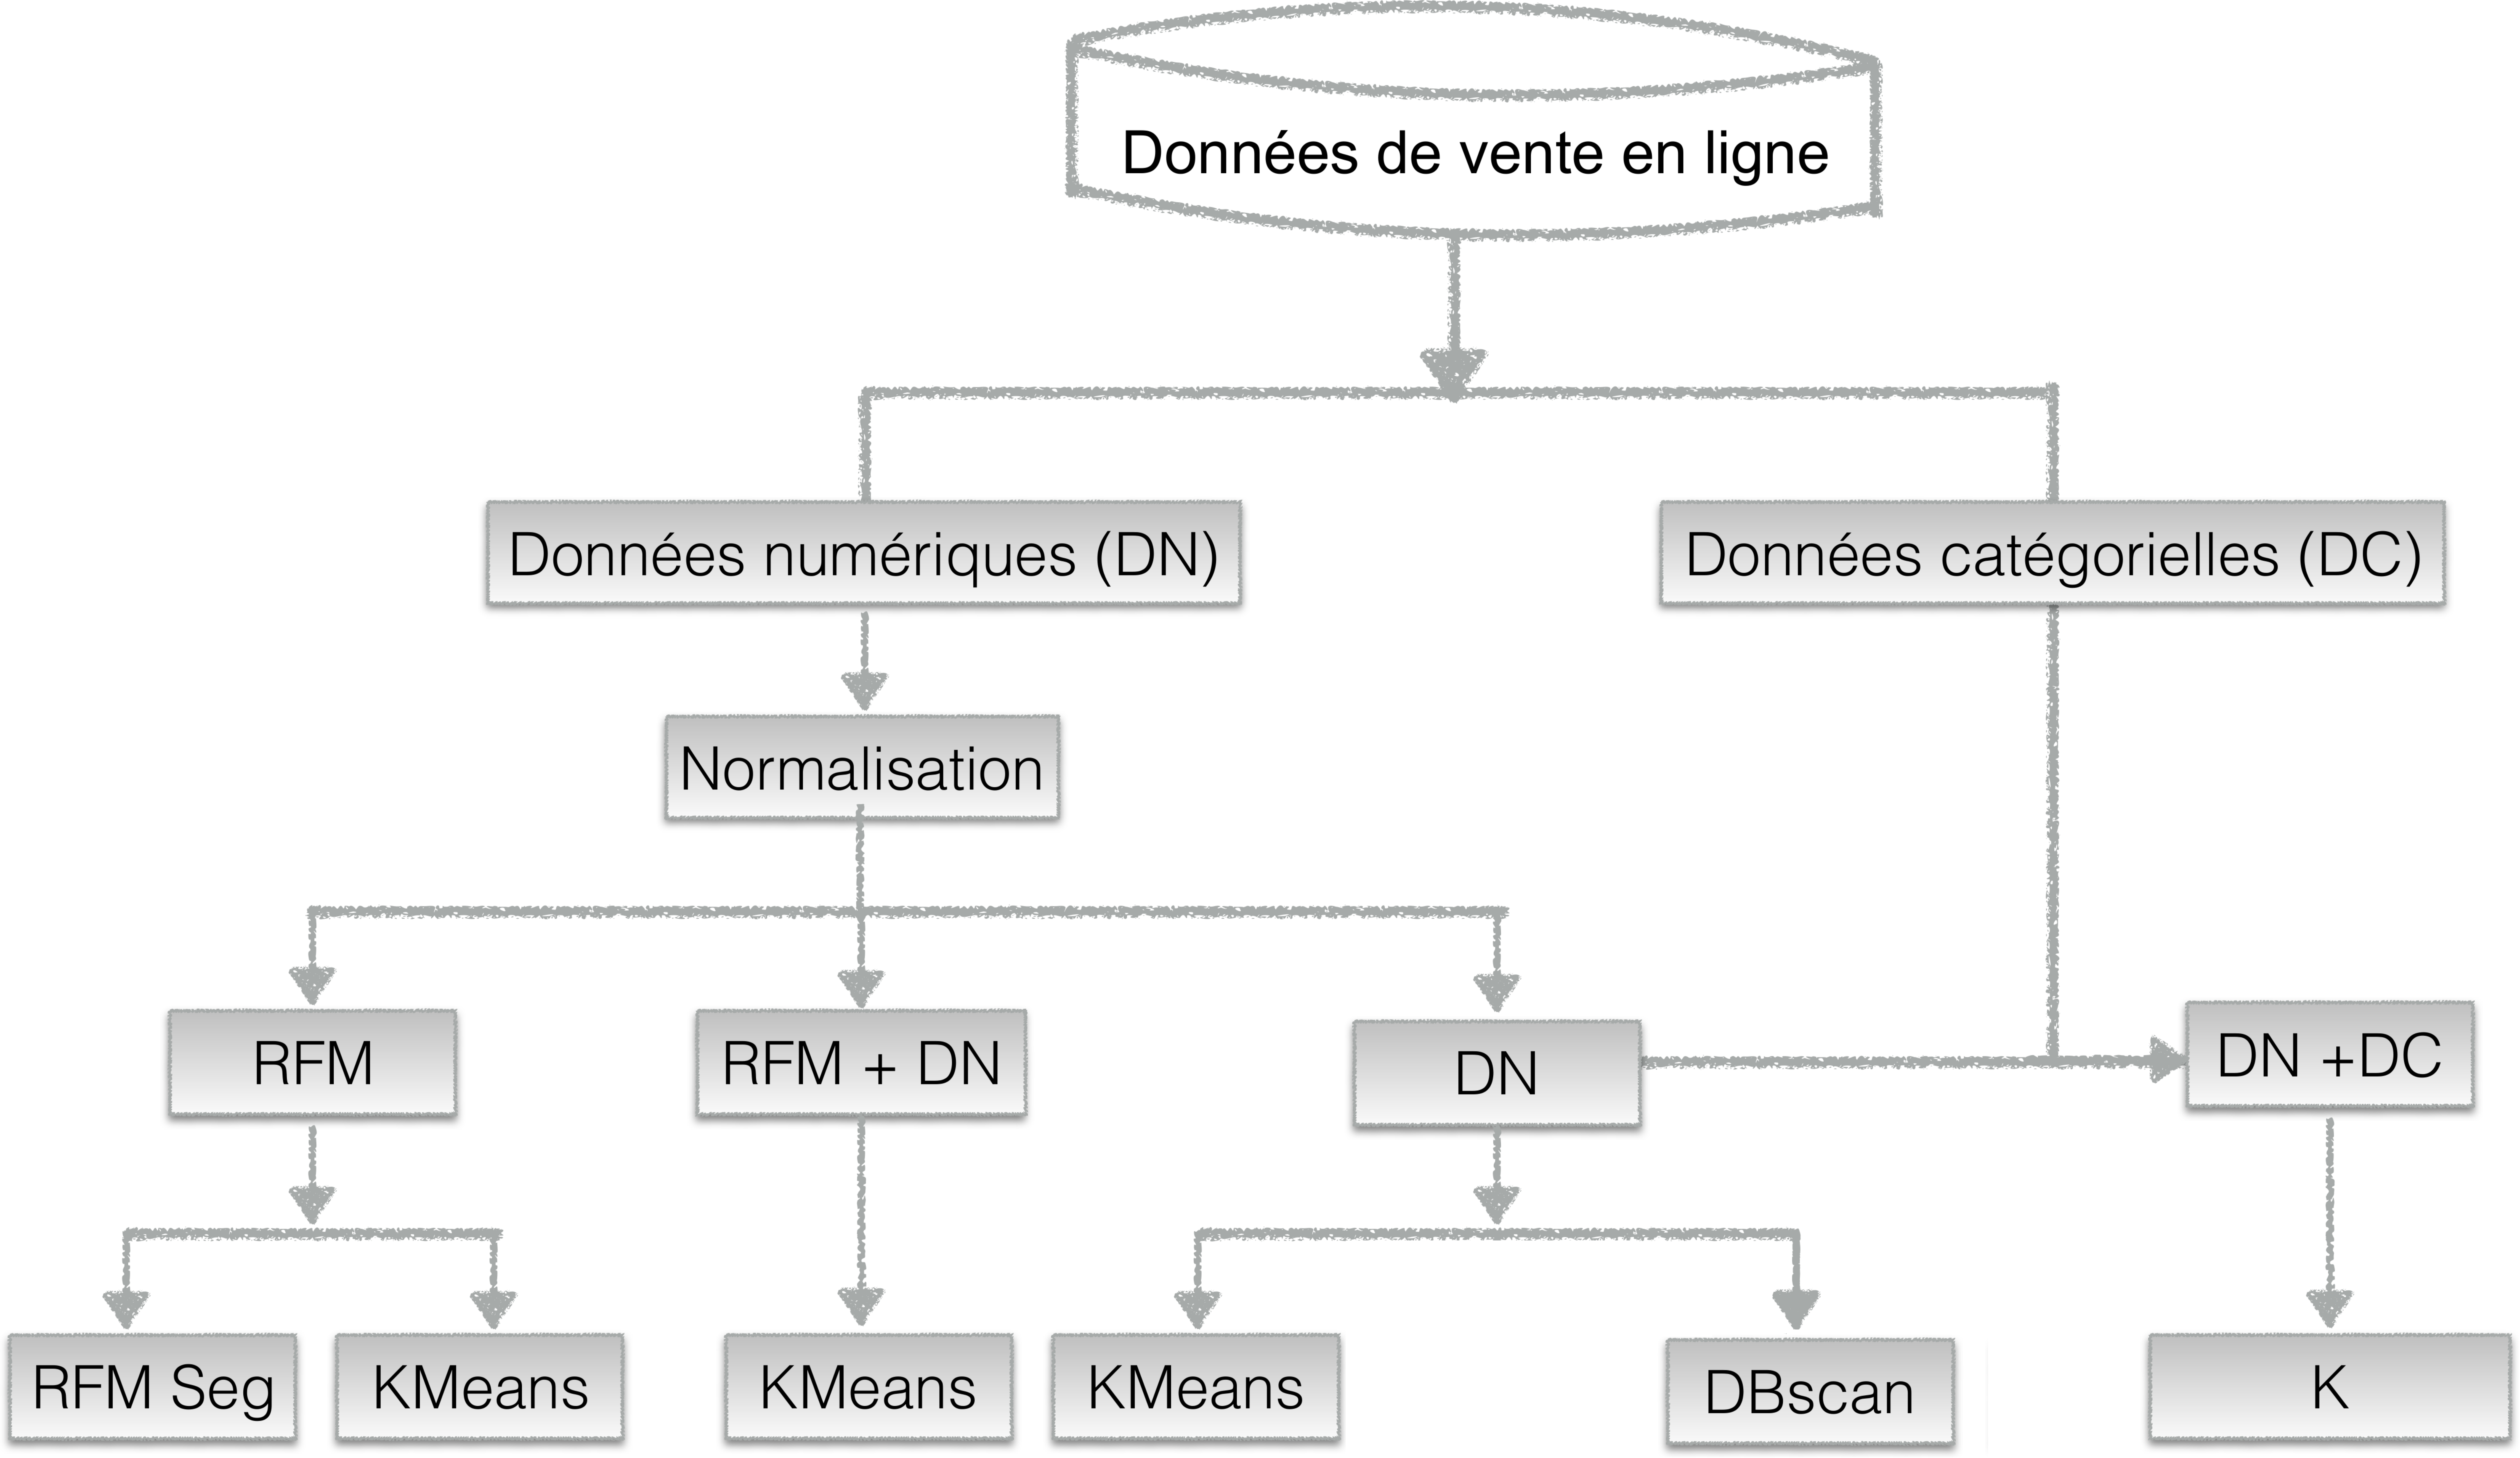

In [1]:
from IPython.display import Image
Image(filename = str("Projet_summary.png"), width=1500, height=1500)

# Chargement des bibliothèques nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns
import os
import shutil
import re

from zipfile import ZipFile
from pathlib import Path

from myfile import plot_box_plot,histplot_plot,plot_data_groupby
from IPython.display import Image

import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

from functools import reduce
from datetime import timedelta

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Données utilisées

In [3]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P5/') 
dir_fig  = Path('../../FIGURES/P5/')
file_in    = Path(str(dir_data) + "/archive.zip")
work_dir=os.getcwd()

file1= Path(str(dir_data) + "/product_category_name_translation.csv")


PROJET_data=Path(str(dir_data) + "/PROJET_DATA.csv")

if file1.exists ():
    print ("Fichier existe")
else:
    with ZipFile(file_in, 'r') as zip:
        zip.printdir()
        zip.extractall()
        for f in os.listdir(work_dir):
            if f.endswith('.csv'):
                shutil.move(os.path.join(work_dir,f),dir_data)

Fichier existe


##  Lecture de données

In [4]:
# Lecture des fichier
df_file={}

var=[]
for file in os.listdir(dir_data):
    print('_'.join(re.split('_|\.',file)[1:3]) ) 
    df_file[ '_'.join(re.split('_|\.',file)[1:3]) ] = pd.read_csv(str(dir_data)+'/'+file)

file_keys=df_file.keys()

products_dataset
geolocation_dataset
order_reviews
sellers_dataset
DATA_csv
category_name
order_payments
orders_dataset
order_items
customers_dataset


##  Schéma de données

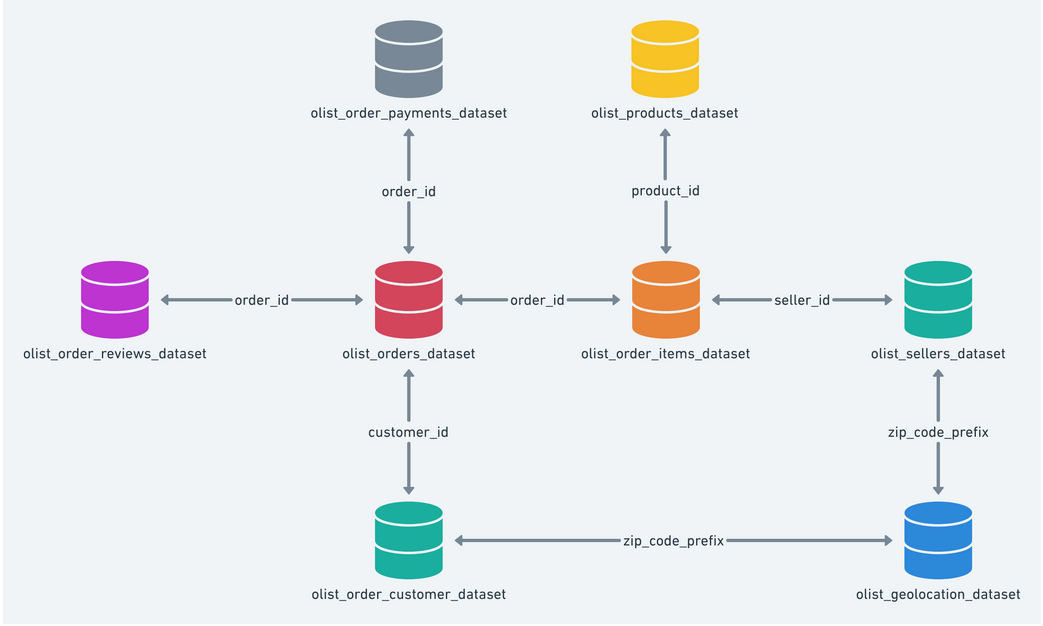

In [5]:
Image(filename = str("Data_Schema.png"), width=1500, height=1500)

## Forme des tableaux 

In [6]:
# Regarder la taille des fichiers
print('Longueur des tableaux des données est  :')
print('---------------------')
for knx in df_file:
    print(knx,' --------',len(df_file[knx]),' --------',  df_file[knx].shape)

Longueur des tableaux des données est  :
---------------------
products_dataset  -------- 32951  -------- (32951, 9)
geolocation_dataset  -------- 1000163  -------- (1000163, 5)
order_reviews  -------- 100000  -------- (100000, 7)
sellers_dataset  -------- 3095  -------- (3095, 4)
DATA_csv  -------- 45569  -------- (45569, 15)
category_name  -------- 71  -------- (71, 2)
order_payments  -------- 103886  -------- (103886, 5)
orders_dataset  -------- 99441  -------- (99441, 8)
order_items  -------- 112650  -------- (112650, 7)
customers_dataset  -------- 99441  -------- (99441, 5)


## Nettoyage des données et ingénierie des caractéristiques

### Uniformiser les clés 

In [7]:
df_Cleaned=copy.deepcopy(df_file)
ID="Zip_code_prefix"
for knx in df_Cleaned:
    for jnx in df_Cleaned[knx].columns:
        if jnx.endswith('zip_code_prefix'):
            df_Cleaned[knx]=df_Cleaned[knx].rename(columns={jnx:ID})       

###  Traiter les doublons

In [8]:
for knx in df_Cleaned:
    df_dup=df_Cleaned[knx].duplicated().sum()
    if df_dup>0:
        df_Cleaned[knx] = df_Cleaned[knx].drop_duplicates()
        print(knx,'  --- Total doublons:  ',df_dup)

geolocation_dataset   --- Total doublons:   261831


In [9]:
for knx in df_Cleaned:
    print(knx,' --------',len(df_Cleaned[knx]),' --------',  df_Cleaned[knx].shape)

products_dataset  -------- 32951  -------- (32951, 9)
geolocation_dataset  -------- 738332  -------- (738332, 5)
order_reviews  -------- 100000  -------- (100000, 7)
sellers_dataset  -------- 3095  -------- (3095, 4)
DATA_csv  -------- 45569  -------- (45569, 15)
category_name  -------- 71  -------- (71, 2)
order_payments  -------- 103886  -------- (103886, 5)
orders_dataset  -------- 99441  -------- (99441, 8)
order_items  -------- 112650  -------- (112650, 7)
customers_dataset  -------- 99441  -------- (99441, 5)


### Traiter les valeurs manquants

In [10]:
for knx in df_Cleaned:
    df_null = df_Cleaned[knx].isnull().sum()
    print(df_null)       

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
seller_id          0
Zip_code_prefix    0
seller_city        0
seller_state       0
dtype: int64
customer_id                 0
order_purchase_timestamp    0
order_approved_at           0
payment_type                0
payment_value               0
review_score                0
review_answer_timestamp     0
pr

Supprimer  les variables review_comment_title et review_comment_message 

In [11]:
define_max_acepteble_nan= 2     # 2 c'est la moitié de NaN or Nul
for knx in df_Cleaned:
    for col_name in df_Cleaned[knx].columns:
        df_null = df_Cleaned[knx].isnull().sum()
        if df_null[col_name]>0:
            if df_null[col_name]> len(df_Cleaned[knx])/define_max_acepteble_nan:
                print(col_name,df_null[col_name],len(df_Cleaned[knx])/define_max_acepteble_nan)
                df_Cleaned[knx]=df_Cleaned[knx].drop([col_name], axis=1)     

review_comment_title 88285 50000.0
review_comment_message 58247 50000.0


In [12]:
for knx in df_Cleaned:
    df_Cleaned[knx]=df_Cleaned[knx].dropna()
    df_null =df_Cleaned[knx].isnull().sum()
    print(knx,'-----',df_Cleaned[knx].shape)

products_dataset ----- (32340, 9)
geolocation_dataset ----- (738332, 5)
order_reviews ----- (100000, 5)
sellers_dataset ----- (3095, 4)
DATA_csv ----- (45569, 15)
category_name ----- (71, 2)
order_payments ----- (103886, 5)
orders_dataset ----- (96461, 8)
order_items ----- (112650, 7)
customers_dataset ----- (99441, 5)


In [13]:
for knx in df_Cleaned:
    df_null = df_Cleaned[knx].isnull().sum()
    print(df_null) 

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64
review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
seller_id          0
Zip_code_prefix    0
seller_city        0
seller_state       0
dtype: int64
customer_id                 0
order_purchase_timestamp    0
order_approved_at           0
payment_type                0
payment_value               0
review_score                0
review_answer_timestamp     0
product_category_name       0
customer_unique_id          0
customer_city               0
customer_state  

###  Traiter les valeurs aberrants

In [14]:
q1value=0.25
q3value=0.75
for knx in df_Cleaned:
    q1 =df_Cleaned[knx].quantile(q1value)
    q3 =df_Cleaned[knx].quantile(q3value)
    iqr = q3-q1  
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_Cleaned[knx] = df_Cleaned[knx][~((df_Cleaned[knx] < fence_low) |(df_Cleaned[knx] > fence_high)).any(axis=1)]

## Fusionner les ensembles de données
On est interesés par les comportement des clients. On doit donc relier les commandes, les produits aux données des clients. 
La taille des donnees geographyque est superieur à la taille des donnees clients. J'enleve les doublons dans le donnees en gardant les customer_unique_id inique. 

In [15]:
# Merge données clients
print('customers                                     ',df_Cleaned['customers_dataset'].shape)
df_merge_people = pd.merge(df_Cleaned['customers_dataset'],df_Cleaned['geolocation_dataset'],\
                                                           left_on='Zip_code_prefix',right_on='Zip_code_prefix')
print('cust+geo                                      ',df_merge_people.shape)
df_merge_people=df_merge_people.drop_duplicates(subset=['customer_unique_id'])
print('cust+geo sans doublans dans customer_unique_id',df_merge_people.shape)


customers                                      (99441, 5)
cust+geo                                       (9200522, 9)
cust+geo sans doublans dans customer_unique_id (80695, 9)


In [16]:
# Merge données commandes et produits
df_merge_order = pd.merge(df_Cleaned['order_items'],df_Cleaned['orders_dataset'],\
                                                           left_on='order_id',right_on='order_id')
df_merge_order = df_merge_order.merge(df_Cleaned['order_payments'],on='order_id')
df_merge_order = df_merge_order.merge(df_Cleaned['order_reviews'], on='order_id')
df_merge_order = df_merge_order.merge(df_Cleaned['products_dataset'], on='product_id')
print('order',df_merge_order.shape)

order (54036, 30)


In [17]:
# relier les commandes, les produits aux données des clients
df_merge = df_merge_order.merge(df_merge_people,on='customer_id')
print('ALL                                           ',df_merge.shape)


ALL                                            (45569, 38)


In [18]:
desc_final =df_merge.describe()
desc_final

order_item_id     price  freight_value  payment_sequential  \
count        45569.0  45569.00       45569.00             45569.0   
mean             1.0     73.09          14.65                 1.0   
std              0.0     52.87           4.54                 0.0   
min              1.0      0.85           1.01                 1.0   
25%              1.0     32.64          11.85                 1.0   
50%              1.0     58.00          14.87                 1.0   
75%              1.0     99.49          17.60                 1.0   
max              1.0    277.00          33.18                 1.0   

       payment_installments  payment_value  review_score  product_name_lenght  \
count               45569.0       45569.00      45569.00             45569.00   
mean                    2.2          92.45          4.59                48.62   
std                     1.8          59.25          0.66                 9.80   
min                     1.0           0.01          3.00                20.00   
25%                     1.0          47.63          4.00                42.00   
50%                     1.0          76.02          5.00                51.00   
75%                     3.0         121.90          5.00                57.00   
max                     8.0         344.26          5.00                76.00   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                    45569.00            45569.00          45569.00   
mean                       636.81                2.02            772.65   
std                        399.33                1.38            769.96   
min                          4.00                1.00              0.00   
25%                        332.00                1.00            230.00   
50%                        550.00                1.00            473.00   
75%                        874.00                3.00           1100.00   
max                       1920.00                6.00           4300.00   

       product_length_cm  product_height_cm  product_width_cm  \
count           45569.00           45569.00          45569.00   
mean               26.17              13.01             20.48   
std                11.09               7.95              8.62   
min                 7.00               2.00              7.00   
25%                17.00               7.00             14.00   
50%                22.00              11.00             18.00   
75%                32.00              17.00             25.00   
max                68.00              40.00             52.00   

       Zip_code_prefix  geolocation_lat  geolocation_lng  
count         45569.00         45569.00         45569.00  
mean          28184.52           -22.53           -46.54  
std           27289.72             2.43             2.80  
min            1003.00           -29.12           -56.38  
25%            8275.00           -23.59           -47.81  
50%           18090.00           -23.04           -46.65  
75%           35680.00           -21.68           -44.16  
max           99980.00           -14.41           -38.95

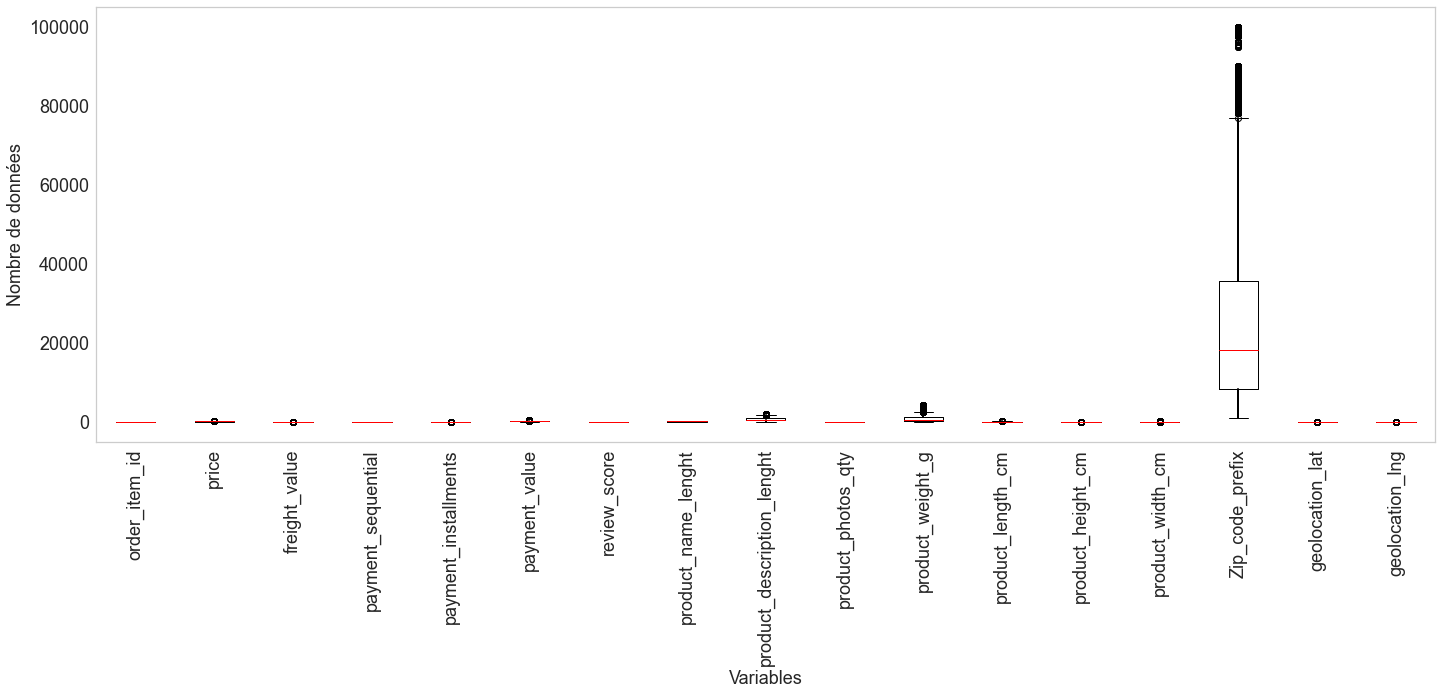

In [19]:
figure_name =Path(str(dir_fig) +'/'+ str('Data_after_cleaning_merging.jpeg'))

xlabel = "Variables"
ylabel = " Nombre de données "
plot_box_plot(df_merge,xlabel,ylabel,figure_name)

In [20]:
df_merge['order_item_id'] = df_merge['order_item_id'].astype('object')

In [21]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 0 to 45568
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       45569 non-null  object 
 1   order_item_id                  45569 non-null  object 
 2   product_id                     45569 non-null  object 
 3   seller_id                      45569 non-null  object 
 4   shipping_limit_date            45569 non-null  object 
 5   price                          45569 non-null  float64
 6   freight_value                  45569 non-null  float64
 7   customer_id                    45569 non-null  object 
 8   order_status                   45569 non-null  object 
 9   order_purchase_timestamp       45569 non-null  object 
 10  order_approved_at              45569 non-null  object 
 11  order_delivered_carrier_date   45569 non-null  object 
 12  order_delivered_customer_date  45569 non-null 

## Extraction de dates

In [22]:
print(df_merge['order_approved_at'].min(), df_merge['order_approved_at'].max())

NOW    = pd.to_datetime(df_merge['order_approved_at'].max()) + timedelta(days=1)
print(NOW)
df_merge['DaysSinceOrder']=(NOW - pd.to_datetime(df_merge['order_approved_at']))
df_merge['DaysSinceOrder'].astype('timedelta64[D]')
df_merge['DaysSinceOrder']=df_merge['DaysSinceOrder'] / np.timedelta64(1, 'D')

2016-10-04 09:43:32 2018-08-29 15:10:26
2018-08-30 15:10:26


In [23]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 0 to 45568
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       45569 non-null  object 
 1   order_item_id                  45569 non-null  object 
 2   product_id                     45569 non-null  object 
 3   seller_id                      45569 non-null  object 
 4   shipping_limit_date            45569 non-null  object 
 5   price                          45569 non-null  float64
 6   freight_value                  45569 non-null  float64
 7   customer_id                    45569 non-null  object 
 8   order_status                   45569 non-null  object 
 9   order_purchase_timestamp       45569 non-null  object 
 10  order_approved_at              45569 non-null  object 
 11  order_delivered_carrier_date   45569 non-null  object 
 12  order_delivered_customer_date  45569 non-null 

In [24]:
df_merge['DeliveryWaitingPeriod'] = pd.to_datetime(df_merge["order_delivered_customer_date"]) - pd.to_datetime(df_merge['order_approved_at'])
df_merge['DeliveryWaitingPeriod'].astype('timedelta64[D]')
df_merge['DeliveryWaitingPeriod']=df_merge['DeliveryWaitingPeriod'] / np.timedelta64(1, 'D')

In [25]:
df_merge['order_approved_at']=pd.to_datetime(df_merge['order_approved_at'])

In [26]:
Dates=df_merge.loc[:, df_merge.columns.str.contains('date')]
for knx in Dates:
    print(knx)
    Dates[knx]=pd.to_datetime(Dates[knx]).astype(int) 
    df_merge=df_merge.drop(knx,axis=1)
    
df_merge=pd.concat([df_merge,Dates],axis=1)

shipping_limit_date
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
review_creation_date


In [27]:
df_merge['TimeSinceRevueCreation'] = pd.to_datetime(df_merge['review_answer_timestamp']).astype(int)\
                                   - pd.to_datetime(df_merge['review_creation_date']).astype(int)

## Variables pertinantes pour l'etude

In [28]:
df_merge.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'Zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state',
       'DaysSinceOrder', 'DeliveryWaitingPeriod', 'shipping_limit_date',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_creation_date',
       'TimeSinceRevueCreation'],
      dtype='object')

In [29]:
what2drop=['payment_sequential','product_photos_qty','product_weight_g',\
           'product_length_cm', 'product_width_cm','product_description_lenght', 'product_name_lenght', 'product_height_cm',\
           'Zip_code_prefix','payment_installments','shipping_limit_date','order_delivered_carrier_date',\
           'order_estimated_delivery_date','order_delivered_customer_date','order_estimated_delivery_date',\
           'geolocation_state', 'geolocation_city','review_id','order_status','order_id', 'order_item_id', \
           'product_id', 'seller_id']
df_merge=df_merge.drop(what2drop,axis=1)
df_merge.columns


Index(['price', 'freight_value', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'payment_type', 'payment_value', 'review_score',
       'review_answer_timestamp', 'product_category_name',
       'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'DaysSinceOrder',
       'DeliveryWaitingPeriod', 'review_creation_date',
       'TimeSinceRevueCreation'],
      dtype='object')

In [30]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 0 to 45568
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     45569 non-null  float64       
 1   freight_value             45569 non-null  float64       
 2   customer_id               45569 non-null  object        
 3   order_purchase_timestamp  45569 non-null  object        
 4   order_approved_at         45569 non-null  datetime64[ns]
 5   payment_type              45569 non-null  object        
 6   payment_value             45569 non-null  float64       
 7   review_score              45569 non-null  int64         
 8   review_answer_timestamp   45569 non-null  object        
 9   product_category_name     45569 non-null  object        
 10  customer_unique_id        45569 non-null  object        
 11  customer_city             45569 non-null  object        
 12  customer_state    

##  Données maintenues pour le projet

### Convertir à log scale

In [31]:
for knx in df_merge.columns:
    if df_merge[knx].dtype == np.object: 
         df_merge[knx]=df_merge[knx]
    elif knx=='review_score':
         df_merge[knx]=df_merge[knx]
    elif knx=='order_approved_at' or knx=='DeliveryWaitingPeriod' or \
         knx=='order_purchase_timestamp' or knx=='review_creation_date' or \
         knx=='geolocation_lat' or knx=='geolocation_lng':
         df_merge[knx]=df_merge[knx]
    else:
        print(knx)
        df_merge[knx]=np.log(df_merge[knx])
        #Check if any null values are still in the final data set

        df_merge[knx].isnull().sum()
        df_merge[knx]=df_merge[knx].dropna()

price
freight_value
payment_value
DaysSinceOrder
TimeSinceRevueCreation


In [32]:
var2drop=['price','freight_value']
df_merge=df_merge.drop(var2drop,axis=1)

In [33]:
df_merge.head()

customer_id order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a      2017-09-13 08:59:02   
1  e6eecc5a77de221464d1c4eaff0a9b64      2017-06-28 11:52:20   
2  4ef55bf80f711b372afebcb7c715344a      2018-05-18 10:25:53   
3  30407a72ad8b3f4df4d15369126b20c9      2017-08-01 18:38:42   
4  91a792fef70ecd8cc69d3c7feb3d12da      2017-08-10 21:48:40   

    order_approved_at payment_type  payment_value  review_score  \
0 2017-09-13 09:45:35  credit_card           4.28             5   
1 2017-06-29 02:44:11       boleto           4.30             5   
2 2018-05-18 12:31:43  credit_card           4.42             4   
3 2017-08-01 18:55:08  credit_card           4.32             5   
4 2017-08-10 22:05:11  credit_card           4.28             5   

  review_answer_timestamp product_category_name  \
0     2017-09-22 10:57:03            cool_stuff   
1     2017-07-17 12:50:07            cool_stuff   
2     2018-06-06 21:41:12            cool_stuff   
3     2017-08-13 03:35:17            cool_stuff   
4     2017-08-28 00:51:18            cool_stuff   

                 customer_unique_id          customer_city customer_state  \
0  871766c5855e863f6eccc05f988b23cb  campos dos goytacazes             RJ   
1  0fb8e3eab2d3e79d92bb3fffbb97f188                  jatai             GO   
2  3419052c8c6b45daf79c1e426f9e9bcb         belo horizonte             MG   
3  e7c828d22c0682c1565252deefbe334d   sao jose dos pinhais             PR   
4  0bb98ba72dcc08e95f9d8cc434e9a2cc   conselheiro lafaiete             MG   

   geolocation_lat  geolocation_lng  DaysSinceOrder  DeliveryWaitingPeriod  \
0           -21.76           -41.31            5.86                   7.58   
1           -17.89           -51.72            6.06                  14.75   
2           -19.92           -43.98            4.65                  17.25   
3           -25.52           -49.12            5.98                   8.11   
4           -20.65           -43.79            5.95                  13.92   

   review_creation_date  TimeSinceRevueCreation  
0   1505952000000000000                   32.47  
1   1499990400000000000                   33.35  
2   1528156800000000000                   32.73  
3   1502323200000000000                   33.24  
4   1503619200000000000                   33.20

In [34]:
df_merge.shape

(45569, 17)

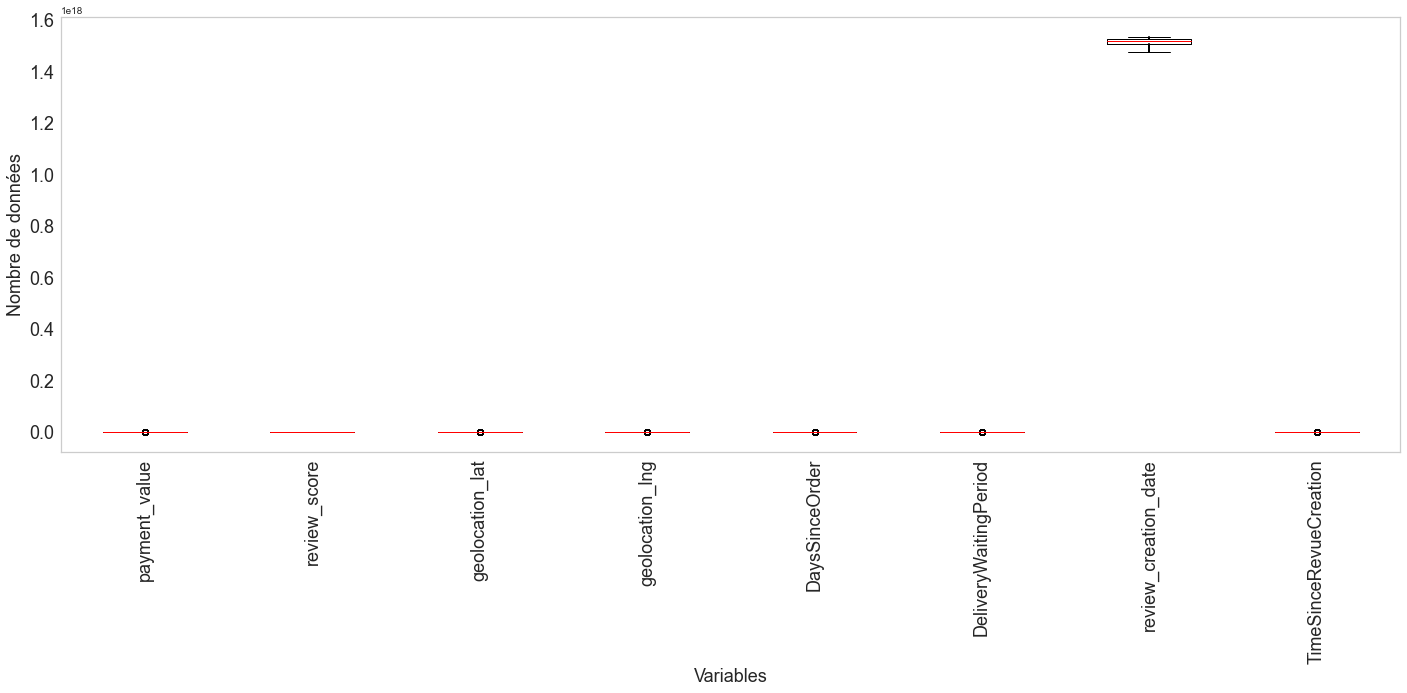

In [35]:
figure_name =Path(str(dir_fig) +'/'+ str('Data_final.jpeg'))

xlabel = "Variables"
ylabel = " Nombre de données "
plot_box_plot(df_merge,xlabel,ylabel,figure_name)

!cp /home/yonss/Bureau/Data_scientist/Data_scientist/FIGURES/P5/Data_final.jpeg /home/yonss/AndroidStudioProjects/Dashboard/Images

### Sauvegarder le fichier final pour le projet

In [36]:
df_merge.to_csv(PROJET_data, index=False)
print ("Creater le fichier pour le projet ")


Creater le fichier pour le projet 


## Un aperçu des données

### Relations entre variables

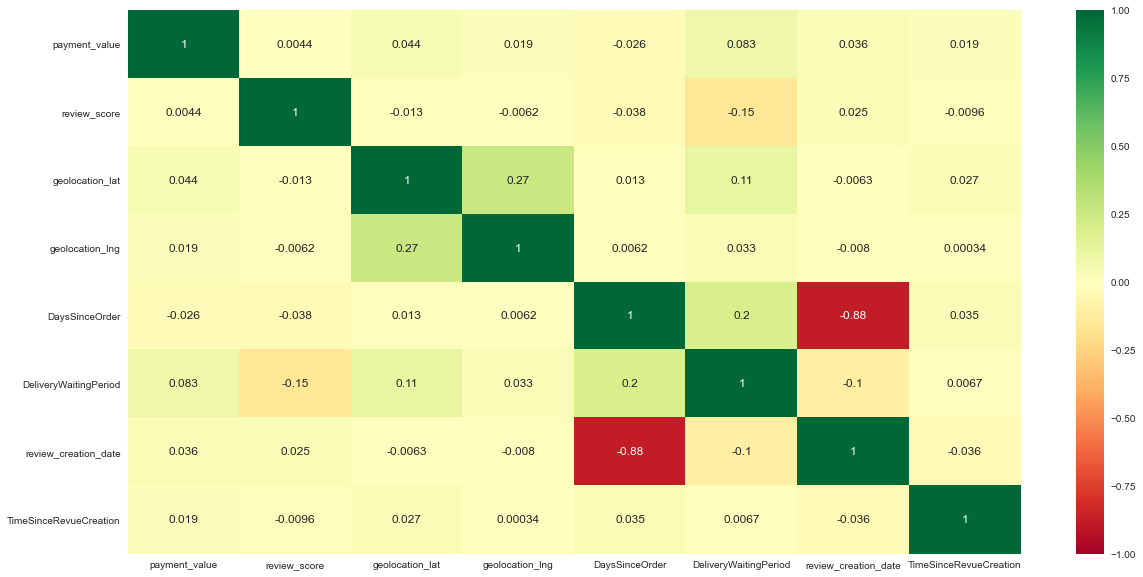

In [37]:
coef_correl=df_merge.corr()
plt.figure(figsize=(20,10))
sns.heatmap(coef_correl, vmin=-1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

### Répartition des données

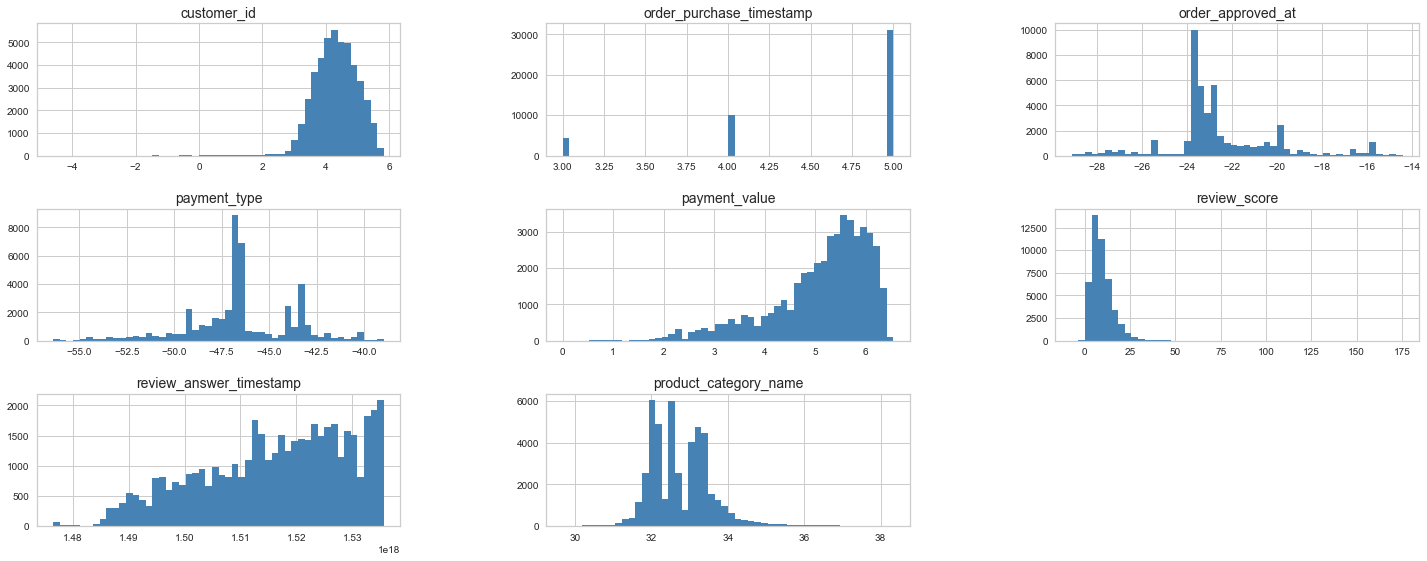

In [38]:
fig = plt.figure(figsize=(24, 28))
feat_idx=0
poss1=9
poss2=3

histplot_plot(fig,df_merge,poss1,poss2,feat_idx)

# Comportement general des consommateurs bresilien à Olist
## Qu'est-ce que ils achètent

Text(0.5, 0, 'Catégorie du produit')

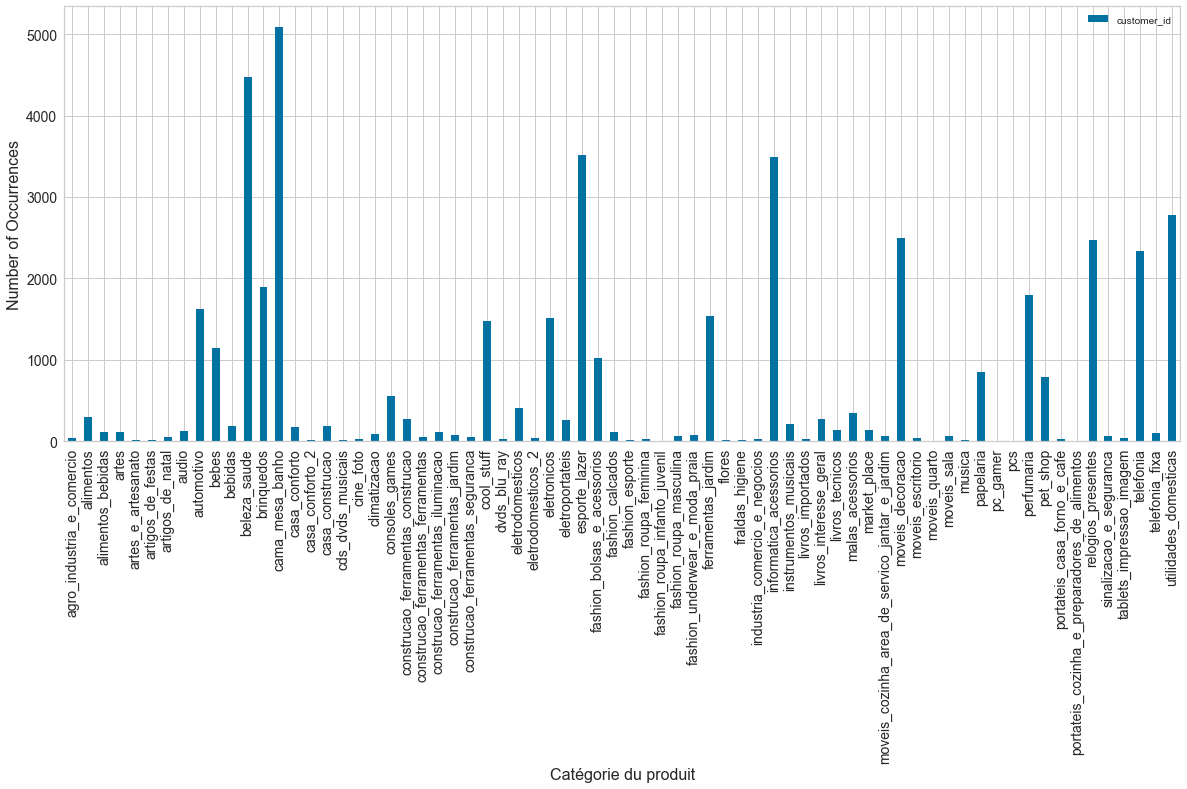

In [39]:
data_2_plot_plot = df_merge.groupby(['product_category_name']).count()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('customer_id')]
Cust_charac.plot.bar(stacked=True,figsize=(20, 8), fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Catégorie du produit', fontsize=16)

### Combien ils dépensent

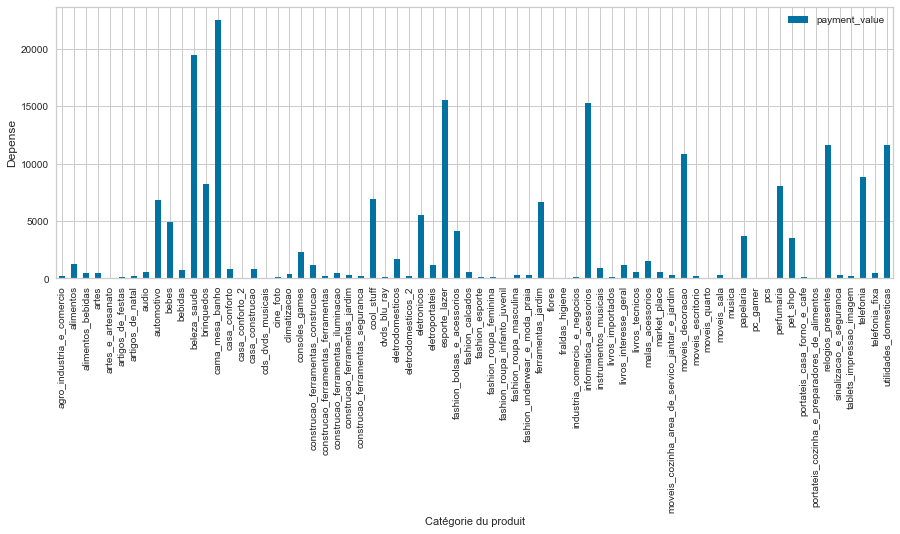

In [40]:
data_2_plot_plot = df_merge.groupby(['product_category_name']).sum()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('payment_value')]
Cust_charac.plot.bar(stacked=True,figsize=(15, 5),legend='Prix')
plt.ylabel('Depense', fontsize=12)
plt.xlabel("Catégorie du produit");

### Mode de payement plus utilisée

Text(0.5, 0, 'Moyen de paiement')

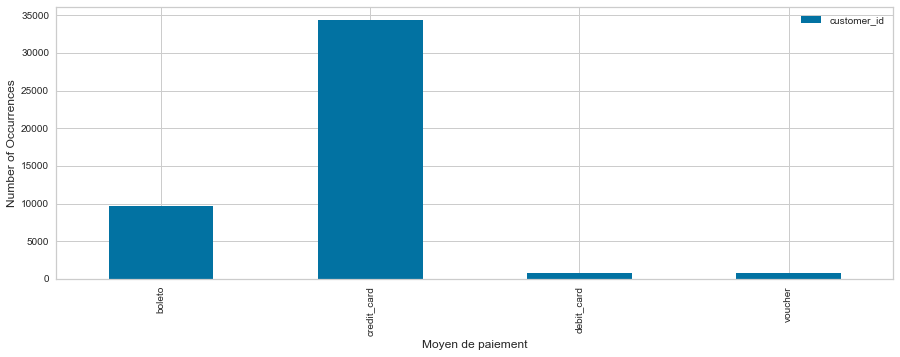

In [41]:
data_2_plot_plot = df_merge.groupby(['payment_type']).count()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('customer_id')]
Cust_charac.plot.bar(stacked=True,figsize=(15, 5))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Moyen de paiement', fontsize=12)

### Satisfaction des consommateurs

Text(0.5, 0, 'Evaluation du client')

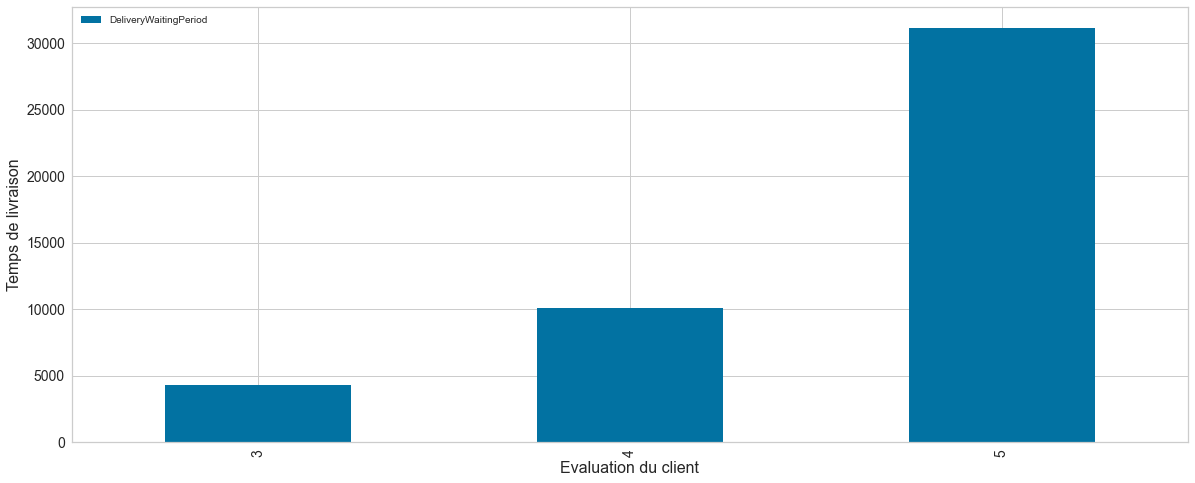

In [42]:
data_2_plot_plot = df_merge.groupby(['review_score']).count()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('DeliveryWaitingPeriod')]
Cust_charac.plot.bar(stacked=True,figsize=(20, 8), fontsize=14)
plt.ylabel('Temps de livraison', fontsize=16)
plt.xlabel('Evaluation du client', fontsize=16)

### Comportement des consommateurs à Olist par états 
#### Localisation des consommateurs

Text(0.5, 0, 'États du Brésil')

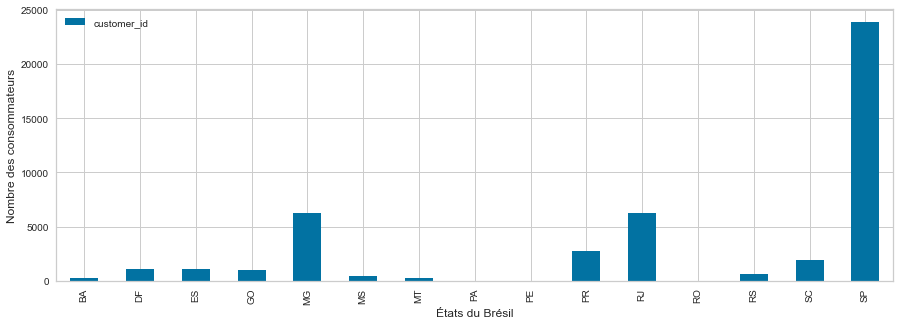

In [43]:
data_2_plot_plot = df_merge.groupby(['customer_state']).count()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('customer_id')]
Cust_charac.plot.bar(stacked=True,figsize=(15, 5))
plt.ylabel('Nombre des consommateurs', fontsize=12)
plt.xlabel('États du Brésil', fontsize=12)

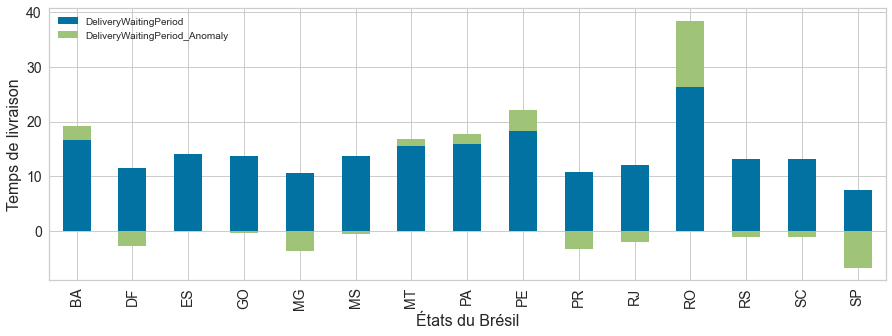

In [44]:
data_2_plot_plot = df_merge.groupby(['customer_state']).mean()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('DeliveryWaitingPeriod')]
Cust_charac['DeliveryWaitingPeriod_Anomaly']=Cust_charac-Cust_charac.mean()
Cust_charac.plot.bar(stacked=True,figsize=(15, 5), fontsize=14)
plt.ylabel('Temps de livraison', fontsize=16)
plt.xlabel('États du Brésil', fontsize=16);

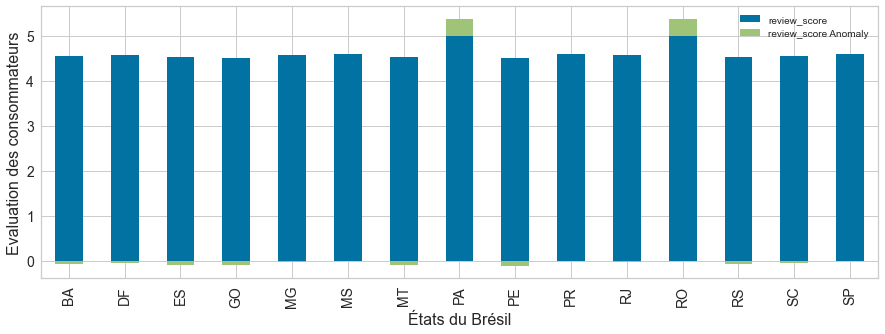

In [45]:
data_2_plot_plot = df_merge.groupby(['customer_state']).mean()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('review_score')]
Cust_charac['review_score Anomaly']=Cust_charac-Cust_charac.mean()
Cust_charac.plot.bar(stacked=True,figsize=(15,5), fontsize=14)
plt.ylabel('Evaluation des consommateurs', fontsize=16)
plt.xlabel('États du Brésil', fontsize=16);

### Comportement des consommateurs dans les villes avec le grand nombre de clients à Olist

In [46]:
data_2_plot_plot=df_merge.groupby(['customer_state']).count()
Cust_charac=data_2_plot_plot.loc[:, data_2_plot_plot.columns.str.contains('customer_id')]
high_cust=Cust_charac.nlargest(3, 'customer_id')   
high_cust

customer_id
customer_state             
SP                    23891
RJ                     6268
MG                     6237

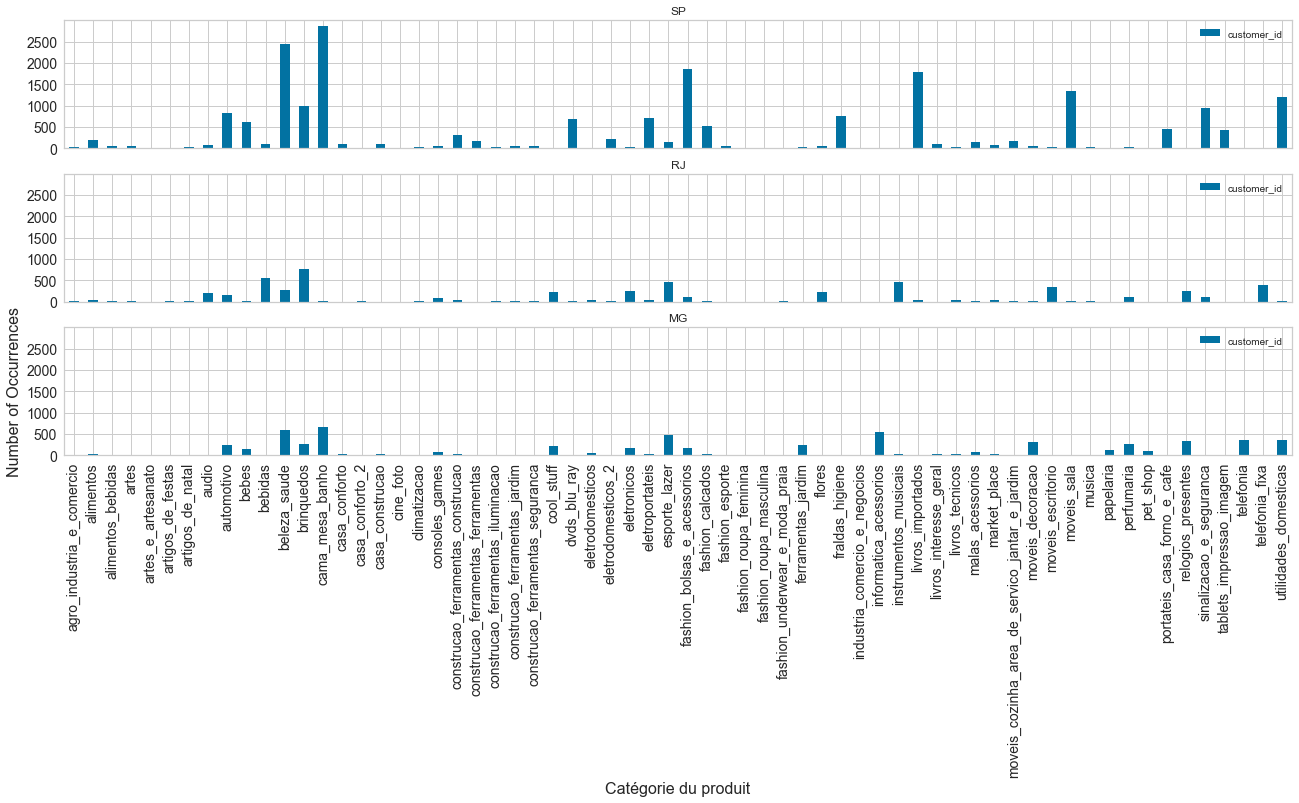

In [47]:
pos=0
states_selection='customer_state'
groupby     ='product_category_name'
what_groupby='customer_id'
ylabel='Number of Occurrences'
xlabel='Catégorie du produit'
col_name=high_cust.T.columns
scount=1
smean=0
ssum=0
fig, axs = plt.subplots (3,1, sharex = True,sharey=True,figsize=(22,8))    
plot_data_groupby(df_merge,states_selection,col_name,groupby,what_groupby,xlabel,ylabel,\
                  fig,scount,smean,ssum, axs,pos)


#### Combien ils dépensent

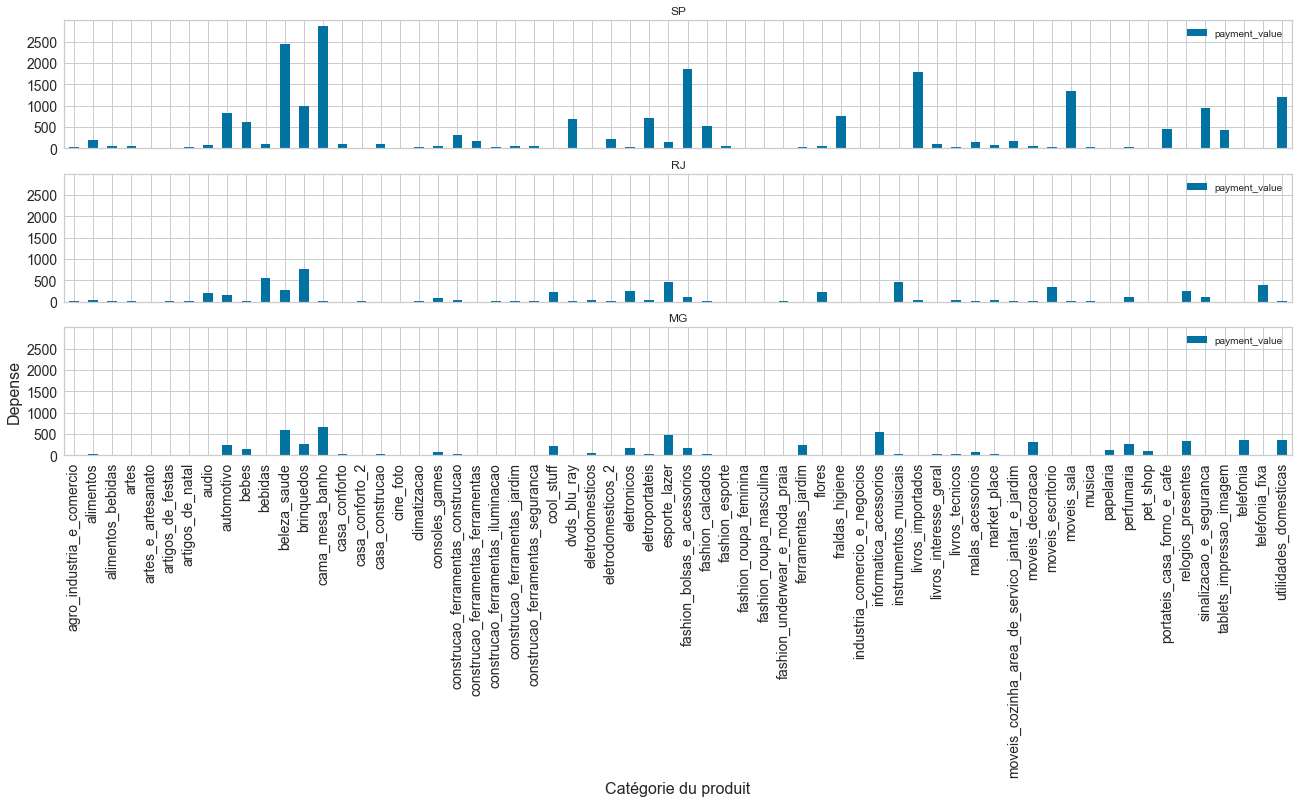

In [48]:
groupby     ='product_category_name'
what_groupby='payment_value'
ylabel='Depense'
xlabel="Catégorie du produit"
scount=1
smean=0
ssum=0
fig, axs = plt.subplots (3,1,  sharex = True,sharey=True,figsize=(22,8))    
plot_data_groupby(df_merge,states_selection,col_name,groupby,what_groupby,xlabel,ylabel,\
                  fig,scount,smean,ssum, axs,pos)


#### Mode de payement plus utilisée

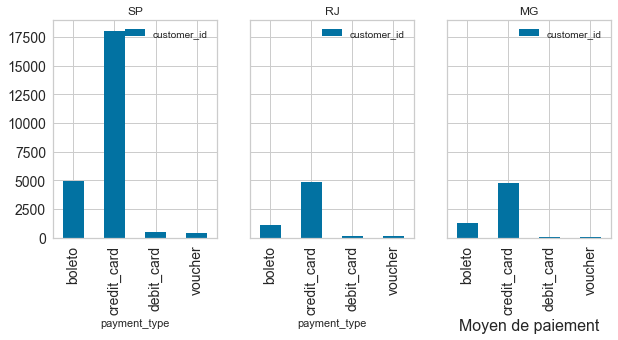

In [49]:
groupby     ='payment_type'
what_groupby='customer_id'
ylabel='Number of Occurrences'
xlabel="Moyen de paiement"

scount=1
smean=0
ssum=0
fig, axs = plt.subplots (1,3,  sharex = True,sharey=True,figsize=(10,4))    
plot_data_groupby(df_merge,states_selection,col_name,groupby,what_groupby,xlabel,ylabel,\
                 fig,scount,smean,ssum, axs,pos)